# 线性回归模型

In [1]:

# Y = W * X + B


from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import os

rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


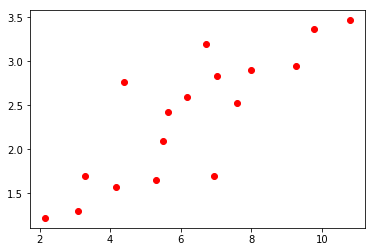

In [2]:
# Training Data
train_X = numpy.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_Y = numpy.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
%matplotlib inline
plt.plot(train_X, train_Y, 'ro', label='Original data')


test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])


In [3]:
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")


# Y = W * X + B

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model y = X * W + b
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (n_samples)
tf.summary.scalar('cost', cost)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.581599891 W= 0.50215805 b= -1.0510126
Epoch: 0100 cost= 0.487856150 W= 0.4725299 b= -0.83506584
Epoch: 0150 cost= 0.414675236 W= 0.44635114 b= -0.6442605
Epoch: 0200 cost= 0.357547283 W= 0.42322037 b= -0.47566995
Epoch: 0250 cost= 0.312951207 W= 0.4027825 b= -0.32670712
Epoch: 0300 cost= 0.278138369 W= 0.38472396 b= -0.1950866
Epoch: 0350 cost= 0.250962943 W= 0.36876795 b= -0.07878942
Epoch: 0400 cost= 0.229749814 W= 0.35466945 b= 0.023968084
Epoch: 0450 cost= 0.213191181 W= 0.34221238 b= 0.11476229
Epoch: 0500 cost= 0.200265974 W= 0.3312056 b= 0.19498602
Epoch: 0550 cost= 0.190177158 W= 0.32148018 b= 0.26587024
Epoch: 0600 cost= 0.182302564 W= 0.31288707 b= 0.32850173
Epoch: 0650 cost= 0.176156402 W= 0.30529442 b= 0.38384145
Epoch: 0700 cost= 0.171359450 W= 0.29858562 b= 0.43273854
Epoch: 0750 cost= 0.167615548 W= 0.29265797 b= 0.47594345
Epoch: 0800 cost= 0.164693892 W= 0.2874203 b= 0.51411784
Epoch: 0850 cost= 0.162413821 W= 0.28279242 b= 0.54784846
Epoch: 0900 c

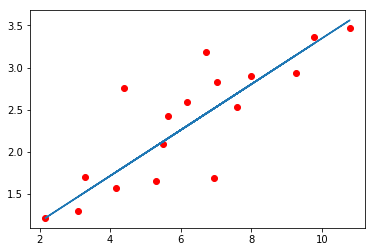

In [4]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter(os.getcwd() + './my_graph/03/linear_reg', sess.graph)
    # Fit all training data
    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(c), \
                  "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    %matplotlib inline
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    # Testing example, as requested (Issue #2)
    
    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))